In [1]:
import pandas as pd

In [2]:
titanic_df= pd.read_csv('titanic-data.csv')

In [3]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<Axes: >

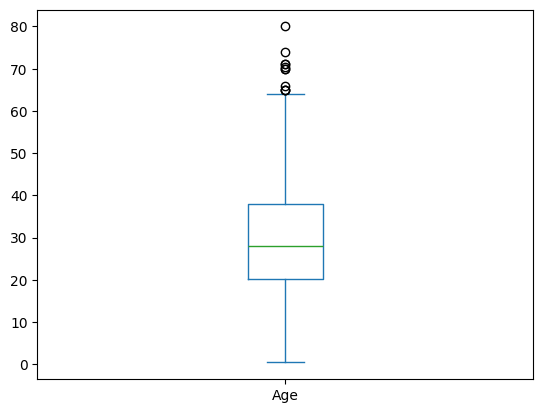

In [4]:
titanic_df.Age.plot.box()

In [6]:
q1= titanic_df.Age.quantile(q=0.25)
q3= titanic_df.Age.quantile(q=0.75)


In [7]:
IQR = q3 - q1

In [8]:
upper_limit= q3 + 1.5 * IQR
lower_limit= q1 - 1.5 * IQR

In [9]:
upper_limit, lower_limit

(np.float64(64.8125), np.float64(-6.6875))

In [11]:
titanic_df_outlier = titanic_df[(titanic_df.Age> upper_limit) | (titanic_df.Age<lower_limit)]

In [12]:
titanic_df_outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


## z-score

In [14]:
import numpy as np
sample=[12, 123,124,15,33,566,43,222,4]

In [22]:
sample_mean = np.mean(sample)
sample_std= np.std(sample, ddof=1)
z_score= sample-sample_mean/sample_std
np.array(z_score).round(2)
np.array(sample)

array([ 12, 123, 124,  15,  33, 566,  43, 222,   4])

In [23]:
import scipy
scipy.stats.zscore(sample,ddof=1)

array([-0.63905996, -0.02163162, -0.01606921, -0.62237271, -0.52224919,
        2.4425193 , -0.46662502,  0.5290477 , -0.6835593 ])

In [25]:
zscore =(titanic_df.Age- titanic_df.Age.mean())/titanic_df.Age.std()
zscore

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: Age, Length: 891, dtype: float64

In [26]:
import scipy
zscore= scipy.stats.zscore(titanic_df.Age.to_numpy(),ddof=1,nan_policy ='omit')

In [28]:
#zscore

In [30]:
titanic_df.Age.std() *2.5 

np.float64(36.31624333083511)

In [31]:
titanic_df[zscore >2.5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
